In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statistics

## Analysis of genes conservativity with expression data and LOEUF per transcript

In [2]:
genes_data = pd.read_csv('../data/all_genes_analysis.tsv', 
                         sep='\t').sort_values(by='AC/N_range', ascending=False) 
genes_data

,Gene_name,AC/N_min,AC/N_max,AC/N_range,LOEUF,Max_median_expression,range_group_custom,range_group_loeuf
1992,CFLAR,0.037736,18373.200000,486889.800000,0.173,4.9175,3,0
5012,ARHGAP26,0.444444,96834.500000,217877.625000,0.276,1.2600,3,0
17988,KRTAP19-6,104120.000000,104120.000000,104120.000000,NaN,0.0000,3,1
14606,FTSJ3,0.714286,70413.363636,98578.709091,0.412,0.2500,3,1
14607,ALDH3A2,0.642202,52503.437500,81755.352679,0.825,3.7125,1,2
...,...,...,...,...,...,...,...,...
12271,ANKRD52,0.185185,0.185185,0.185185,0.090,17.4000,2,0
7814,ENSG00000288634,0.136364,0.136364,0.136364,NaN,NaN,2,1
17451,MBD3L4,0.125000,0.125000,0.125000,1.885,0.0000,2,2
9962,SMNDC1,0.122951,0.122951,0.122951,0.529,8.4200,2,1


In [3]:
range_values = genes_data['AC/N_range']

q1 = np.percentile(range_values, 33.33)
median = np.percentile(range_values, 66.67)
q3 = np.percentile(range_values, 100)

print(q1, median, q3)

1.5435999039562631 3.811976470588236 486889.8000000001


In [4]:
def define_group_range(range):
    if range <= q1 and range > 1: # all transcripts are very similar (AC/N both small and large), AC/N for each transcript >= 1
        return 0
    elif range >= q3: # The gene exhibits a substantial variation in the presence of AC and N in loss-of-function variants across various transcripts.
        return 3
    elif range < 1:
        return 2      # few transcripts, all N > AC
    else:
        return 1 # All transcripts of the gene exhibit an AC/N ratio greater than or equal to 1.

def define_group_loeuf(range):
    if range == None:
        return None
    if range < 0.35:
        return 0 # the gene highly LoF intolerant 
    elif range > 0.75:
        return 2 # the gene is LoF tolerant
    else:
        return 1 # the gene is moderately LoF tolerant

In [5]:
genes_data['range_group_custom'] = genes_data['AC/N_range'].apply(define_group_range)
genes_data['range_group_custom'] = genes_data['range_group_custom'].astype('category')

genes_data['range_group_loeuf'] = genes_data['LOEUF'].apply(define_group_loeuf)
genes_data['range_group_loeuf'] = genes_data['range_group_loeuf'].astype('category')
genes_data

,Gene_name,AC/N_min,AC/N_max,AC/N_range,LOEUF,Max_median_expression,range_group_custom,range_group_loeuf
1992,CFLAR,0.037736,18373.200000,486889.800000,0.173,4.9175,3,0
5012,ARHGAP26,0.444444,96834.500000,217877.625000,0.276,1.2600,1,0
17988,KRTAP19-6,104120.000000,104120.000000,104120.000000,NaN,0.0000,1,1
14606,FTSJ3,0.714286,70413.363636,98578.709091,0.412,0.2500,1,1
14607,ALDH3A2,0.642202,52503.437500,81755.352679,0.825,3.7125,1,2
...,...,...,...,...,...,...,...,...
12271,ANKRD52,0.185185,0.185185,0.185185,0.090,17.4000,2,0
7814,ENSG00000288634,0.136364,0.136364,0.136364,NaN,NaN,2,1
17451,MBD3L4,0.125000,0.125000,0.125000,1.885,0.0000,2,2
9962,SMNDC1,0.122951,0.122951,0.122951,0.529,8.4200,2,1


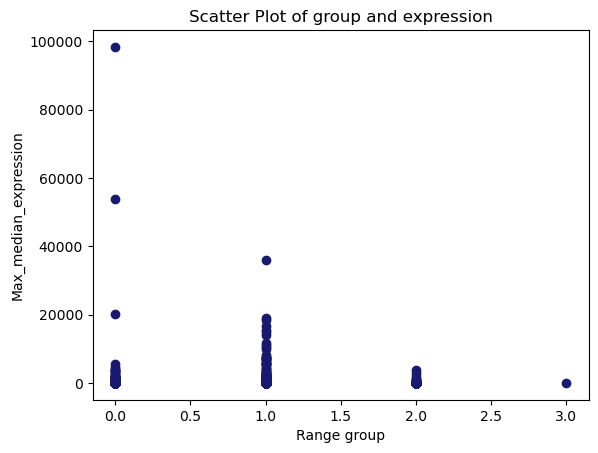

In [6]:
plt.scatter(genes_data['range_group_custom'], genes_data['Max_median_expression'], color = 'midnightblue')
plt.xlabel('Range group')
plt.ylabel('Max_median_expression')
plt.title('Scatter Plot of group and expression')
plt.show()

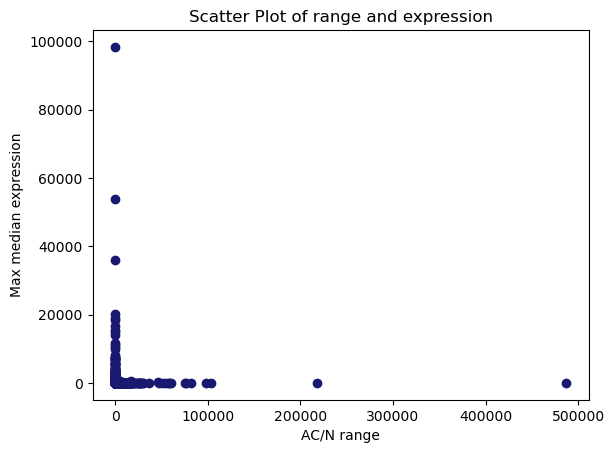

In [7]:
plt.scatter(genes_data['AC/N_range'], genes_data['Max_median_expression'], color = 'midnightblue')
plt.xlabel('AC/N range')
plt.ylabel('Max median expression')
plt.title('Scatter Plot of range and expression')
plt.show()

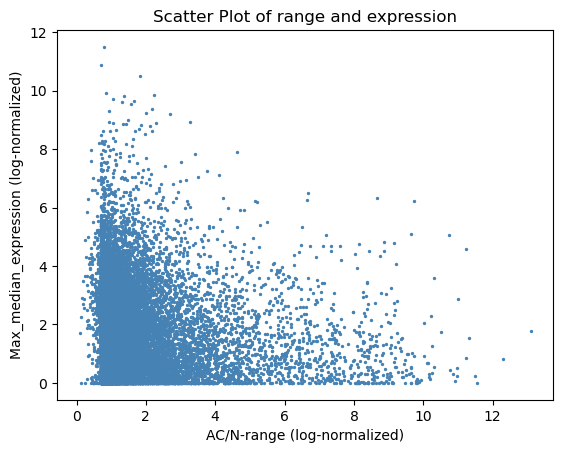

In [8]:
plt.scatter(np.log1p(genes_data['AC/N_range']), np.log1p(genes_data['Max_median_expression']), s=2, color = 'steelblue')
plt.xlabel('AC/N-range (log-normalized)')
plt.ylabel('Max_median_expression (log-normalized)')
plt.title('Scatter Plot of range and expression')
plt.savefig('../data/plots/AC_N_range_and_expression.png', bbox_inches='tight')
plt.show()

In [9]:
filtered_genes_expression = genes_data.loc[
    (np.log1p(genes_data['AC/N_range']) >= 6) &
    (np.log1p(genes_data['Max_median_expression']) >= 1.5) &
    (genes_data['range_group_loeuf'] != 2)]

filtered_genes_expression.sort_values(by='Max_median_expression', ascending=False)

,Gene_name,AC/N_min,AC/N_max,AC/N_range,LOEUF,Max_median_expression,range_group_custom,range_group_loeuf
5877,HLA-DRA,1.758621,29322.275862,16673.450980,0.594,510.54,1,1
8485,NPDC1,1.069767,7535.253333,7043.823768,0.736,121.60,1,1
5906,MTCH1,1.493976,979.125000,655.382056,0.439,110.63,1,1
14636,RPL23A,1.333333,1626.000000,1219.500000,0.393,105.78,1,1
12272,TPT1,1.000000,76186.454545,76186.454545,0.485,97.10,1,1
...,...,...,...,...,...,...,...,...
2024,MEMO1,1.636364,746.650000,456.286111,0.242,3.86,1,0
18217,HPS4,3.222222,2179.750000,676.474138,0.633,3.73,1,1
8493,PCSK5,0.445055,753.263056,1692.516990,0.499,3.68,1,1
2010,ANKRD36C,1.000000,1665.032609,1665.032609,NaN,3.51,1,1


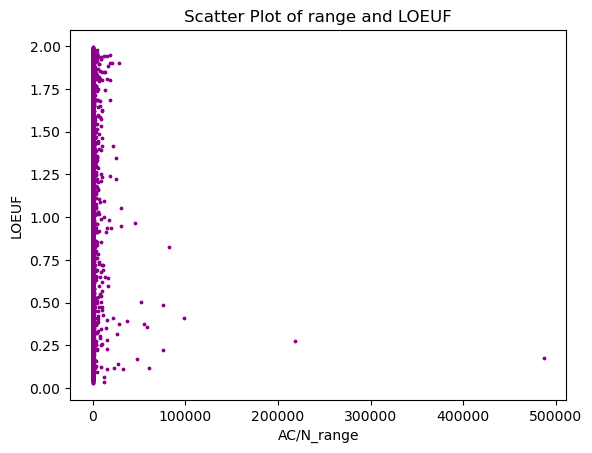

In [10]:
plt.scatter(genes_data['AC/N_range'], genes_data['LOEUF'], s=3, color = 'darkmagenta')
plt.xlabel('AC/N_range')
plt.ylabel('LOEUF')
plt.title('Scatter Plot of range and LOEUF')
plt.savefig('../data/plots/AC_N_range_and_LOEUF.png', bbox_inches='tight')
plt.show()

In [11]:
genes_data.loc[
    (genes_data['AC/N_range'] >= 200000) &
    (genes_data['LOEUF'] <= 0.5)].sort_values(by='Max_median_expression', ascending=False)

,Gene_name,AC/N_min,AC/N_max,AC/N_range,LOEUF,Max_median_expression,range_group_custom,range_group_loeuf
1992,CFLAR,0.037736,18373.2,486889.800,0.173,4.9175,3,0
5012,ARHGAP26,0.444444,96834.5,217877.625,0.276,1.2600,1,0


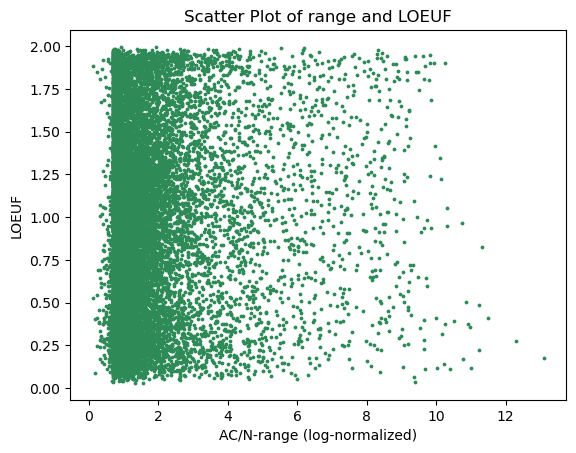

In [12]:
plt.scatter(np.log1p(genes_data['AC/N_range']), genes_data['LOEUF'], s=3, color = 'seagreen')
plt.xlabel('AC/N-range (log-normalized)')
plt.ylabel('LOEUF')
plt.title('Scatter Plot of range and LOEUF')
plt.savefig('../data/plots/AC_N_range_and_LOEUF_norm.png', bbox_inches='tight')
plt.show()

In [13]:
filtered_genes_loeuf = genes_data.loc[
    (np.log1p(genes_data['AC/N_range']) >= 6) &
    (np.log1p(genes_data['LOEUF']) <= 0.25)]

filtered_genes_loeuf.sort_values(by='Max_median_expression', ascending=False)

,Gene_name,AC/N_min,AC/N_max,AC/N_range,LOEUF,Max_median_expression,range_group_custom,range_group_loeuf
10006,SPI1,1.090909,1699.416667,1557.798611,0.244,91.5000,1,0
10012,ZFP91,985.512821,985.512821,985.512821,0.172,73.0100,1,0
5917,RPS10,1.666667,686.400000,411.840000,0.273,33.4800,1,0
17989,SON,7.536585,455935.000000,60496.229773,0.118,16.5175,1,0
9250,FRMD4A,0.262136,196.750000,750.564815,0.135,12.4700,1,0
39,NCDN,1.166667,651.750000,558.642857,0.175,12.0250,1,0
9,UBR4,0.782609,3402.603175,4347.770723,0.095,11.5400,1,0
8487,RAD23B,1.200000,4793.166667,3994.305556,0.227,10.0550,1,0
13774,ATXN2L,0.800000,21947.680000,27434.600000,0.143,8.9100,1,0
16038,USF2,1.041667,3828.950000,3675.792000,0.249,7.0500,1,0


# **A list of genes of interest**

In [14]:
selected_genes = pd.merge(filtered_genes_expression, filtered_genes_loeuf, how='inner')
selected_genes

,Gene_name,AC/N_min,AC/N_max,AC/N_range,LOEUF,Max_median_expression,range_group_custom,range_group_loeuf
0,CFLAR,0.037736,18373.200000,486889.800000,0.173,4.9175,3,0
1,SON,7.536585,455935.000000,60496.229773,0.118,16.5175,1,0
2,ATXN2L,0.800000,21947.680000,27434.600000,0.143,8.9100,1,0
3,UBR4,0.782609,3402.603175,4347.770723,0.095,11.5400,1,0
4,RAD23B,1.200000,4793.166667,3994.305556,0.227,10.0550,1,0
5,USF2,1.041667,3828.950000,3675.792000,0.249,7.0500,1,0
6,SPI1,1.090909,1699.416667,1557.798611,0.244,91.5000,1,0
7,CSNK1G2,0.259259,374.100000,1442.957143,0.254,3.5000,1,0
8,SCAF11,0.526316,526.692308,1000.715385,0.193,3.8800,1,0
9,ZFP91,985.512821,985.512821,985.512821,0.172,73.0100,1,0


# Analysis of some genes

## **CFLAR** CASP8 and FADD like apoptosis regulator

### Ensembl canonical transcript - **ENST00000309955.8**

In [15]:
gene_data_CFLAR = pd.read_csv('/home/bioinf/gnomad-variants/Grishchenko/processed_data/tables/ac_expression_tables/CFLAR.tsv', 
                         sep='\t')
gene_data_CFLAR = gene_data_CFLAR[
    (gene_data_CFLAR['Feature_Type'] == 'Transcript') & 
    (gene_data_CFLAR['BIOTYPE'] == 'protein_coding') ]

values_to_filter = ['stop_gained', 'frameshift_variant', 'splice_donor_variant', 'splice_acceptor_variant']

gene_data_CFLAR = gene_data_CFLAR[gene_data_CFLAR['Consequence'].isin(values_to_filter)]
gene_data_CFLAR = gene_data_CFLAR[gene_data_CFLAR['Feature'].str.contains('ENST')]
gene_data_CFLAR

/tmp/ipykernel_1907651/3206021249.py:1: DtypeWarning: Columns (24,25,26,27,28,29,30,31,44,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  gene_data_CFLAR = pd.read_csv('/home/bioinf/gnomad-variants/Grishchenko/processed_data/tables/ac_expression_tables/CFLAR.tsv',


,CHROM,POS,ID,REF,ALT,AC,AC_afr,AC_amr,AC_nfe,AC_asj,...,BIOTYPE,EXON,INTRON,ALLELE_NUM,VARIANT_CLASS,CANONICAL,LoF,LoF_filter,LoF_flags,LoF_info
14434,chr2,201130055,rs1400059130,C,T,1,0,0,0,0,...,protein_coding,2/10,NaN,1,SNV,YES,HC,NaN,NaN,PERCENTILE:0.131670131670132
14435,chr2,201130055,rs1400059130,C,T,1,0,0,0,0,...,protein_coding,2/6,NaN,1,SNV,NaN,HC,NaN,NaN,PERCENTILE:0.285285285285285
14436,chr2,201130055,rs1400059130,C,T,1,0,0,0,0,...,protein_coding,2/8,NaN,1,SNV,NaN,HC,NaN,NaN,PERCENTILE:0.142002989536622
14437,chr2,201130055,rs1400059130,C,T,1,0,0,0,0,...,protein_coding,2/9,NaN,1,SNV,NaN,HC,NaN,NaN,PERCENTILE:0.216154721274175
14438,chr2,201130055,rs1400059130,C,T,1,0,0,0,0,...,protein_coding,2/5,NaN,1,SNV,NaN,HC,NaN,NaN,PERCENTILE:0.252324037184595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309332,chr2,201163955,NaN,T,TA,1,0,0,0,0,...,protein_coding,9/9,NaN,1,insertion,NaN,HC,NaN,NaN,PERCENTILE:0.985281385281385
309757,chr2,201163969,NaN,CA,C,2,0,0,2,0,...,protein_coding,10/10,NaN,1,deletion,YES,HC,NaN,NaN,PERCENTILE:0.997920997920998
309758,chr2,201163969,NaN,CA,C,2,0,0,2,0,...,protein_coding,8/8,NaN,1,deletion,NaN,HC,NaN,NaN,PERCENTILE:0.997757847533632
309759,chr2,201163969,NaN,CA,C,2,0,0,2,0,...,protein_coding,10/10,NaN,1,deletion,NaN,HC,NaN,NaN,PERCENTILE:0.997920997920998


In [16]:
sum_ac_per_transcript = gene_data_CFLAR.groupby('Feature')['AC']

transcript_list = []

for key, group in sum_ac_per_transcript:
    transcript_list.append(key)
sum_ac_per_transcript = gene_data_CFLAR.groupby('Feature')['AC']

sum_ac = []

for key, group in sum_ac_per_transcript:
    unique_values = group.sum()  # Extract the unique values
    sum_ac.append(unique_values)

population_ac = ['AC_afr', 'AC_amr', 'AC_nfe', 'AC_asj', 'AC_sas', 'AC_eas', 'AC_mid', 'AC_fin']

sum_population_ac = [[], [], [], [], [], [], [], []]


for idx, el in enumerate(population_ac):
    sum_population = []
    sum_AC_per_transcript = gene_data_CFLAR.groupby('Feature')[el]
    for key, group in sum_AC_per_transcript:
        unique_values = group.sum()
        sum_population.append(unique_values)
        sum_population_ac[idx].append(sum(sum_population))
        sum_population = []

gene_name_per_transcript = gene_data_CFLAR.groupby('Feature')['SYMBOL']
gene_names = []

for key, group in gene_name_per_transcript:
    unique_values = group.unique()  # Extract the unique values
    gene_names.extend(unique_values)

gene_id_per_transcript = gene_data_CFLAR.groupby('Feature')['Gene']

gene_id = []

for key, group in gene_id_per_transcript:
    unique_values = group.unique()  # Extract the unique values
    gene_id.extend(unique_values)

alt_per_transcript = gene_data_CFLAR.groupby('Feature')['ALT']

alt_sum = []

for key, group in alt_per_transcript:
    unique_values = len(group.sum())
    alt_sum.append(unique_values)

transcripts_df_ac_CFLAR = pd.DataFrame({
    'Transcript_ID': transcript_list,
    'AC': sum_ac,
    'AC_afr': sum_population_ac[0],
    'AC_amr': sum_population_ac[1],
    'AC_nfe': sum_population_ac[2],
    'AC_asj': sum_population_ac[3],
    'AC_sas': sum_population_ac[4],
    'AC_eas': sum_population_ac[5],
    'AC_mid': sum_population_ac[6],
    'AC_fin': sum_population_ac[7],
    'Gene_name': gene_names,
    'Gene_id': gene_id,
    'Variant': alt_sum
})

In [17]:
transcripts_df_ac_CFLAR['AC/Variant'] = transcripts_df_ac_CFLAR['AC']/transcripts_df_ac_CFLAR['Variant']
transcripts_df_ac_CFLAR

,Transcript_ID,AC,AC_afr,AC_amr,AC_nfe,AC_asj,AC_sas,AC_eas,AC_mid,AC_fin,Gene_name,Gene_id,Variant,AC/Variant
0,ENST00000309955,39,0,0,31,0,2,1,1,1,CFLAR,ENSG00000003402,89,0.438202
1,ENST00000341222,275600,13548,4675,218623,6601,10520,774,1144,7972,CFLAR,ENSG00000003402,68,4052.941176
2,ENST00000341582,30,0,0,23,0,2,0,1,1,CFLAR,ENSG00000003402,82,0.365854
3,ENST00000342795,29,0,0,23,0,3,1,1,1,CFLAR,ENSG00000003402,78,0.371795
4,ENST00000395148,417,0,2,382,1,13,1,1,1,CFLAR,ENSG00000003402,72,5.791667
5,ENST00000417748,2,0,0,0,0,0,0,1,1,CFLAR,ENSG00000003402,53,0.037736
6,ENST00000423241,39,0,0,31,0,2,1,1,1,CFLAR,ENSG00000003402,89,0.438202
7,ENST00000433445,1,0,0,0,0,0,0,0,1,CFLAR,ENSG00000003402,1,1.000000
8,ENST00000440180,275600,13548,4675,218623,6601,10520,774,1144,7972,CFLAR,ENSG00000003402,68,4052.941176
9,ENST00000441224,4,0,0,1,0,1,0,1,1,CFLAR,ENSG00000003402,54,0.074074


Транскрипты канонический и следующий неканонический отличаются размером белка. Второй в два раза меньше

### Adding information about LOEUF for each transcript

In [18]:
constraint_transcript = pd.read_csv('/home/bioinf/gnomad-variants/raw_data/plof_metrics/gnomad.v4.1.constraint_metrics.tsv', sep='\t')

In [19]:
constraint_transcript

,gene,gene_id,transcript,canonical,mane_select,lof_hc_lc.obs,lof_hc_lc.exp,lof_hc_lc.possible,lof_hc_lc.oe,lof_hc_lc.mu,...,syn.oe_ci.lower,syn.oe_ci.upper,syn.z_raw,syn.z_score,constraint_flags,level,transcript_type,chromosome,cds_length,num_coding_exons
0,A1BG,1,NM_130786.4,True,True,45.0,43.048,193.0,1.04540,7.063300e-07,...,0.973,1.172,-1.166000,-0.635490,[],NaN,NaN,NaN,NaN,NaN
1,A1BG,ENSG00000121410,ENST00000263100,True,True,45.0,43.048,193.0,1.04540,7.063300e-07,...,0.973,1.172,-1.166000,-0.635490,[],2.0,protein_coding,chr19,1485.0,8.0
2,A1BG,ENSG00000121410,ENST00000600966,False,False,24.0,26.268,123.0,0.91365,4.197900e-07,...,0.817,1.055,0.964250,0.525560,[],1.0,protein_coding,chr19,917.0,5.0
3,A1CF,29974,NM_001198818.2,False,False,45.0,69.962,352.0,0.64320,9.547100e-07,...,0.903,1.103,0.032727,0.017838,[],NaN,NaN,NaN,NaN,NaN
4,A1CF,29974,NM_001198819.2,False,False,48.0,72.811,367.0,0.65924,1.017600e-06,...,0.888,1.086,0.300030,0.163530,[],NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211518,NaN,ENSG00000289346,ENST00000625377,True,False,5.0,12.136,71.0,0.41201,1.796400e-07,...,0.191,0.412,5.816400,3.170200,[],2.0,protein_coding,chr7,2847.0,15.0
211519,NaN,ENSG00000289503,ENST00000553426,True,False,NaN,NaN,NaN,NaN,NaN,...,0.633,1.457,0.208200,0.113480,"[""no_exp_lof""]",2.0,nonsense_mediated_decay,chr14,208.0,3.0
211520,NaN,ENSG00000289517,ENST00000617178,True,False,NaN,NaN,NaN,NaN,NaN,...,0.833,1.217,-0.038967,-0.021239,"[""no_exp_lof""]",2.0,nonsense_mediated_decay,chr22,440.0,4.0
211521,NaN,ENSG00000289565,ENST00000632040,True,False,NaN,NaN,NaN,NaN,NaN,...,0.691,1.153,0.755130,0.411580,"[""no_exp_lof""]",2.0,nonsense_mediated_decay,chr1,317.0,3.0


In [20]:
columns_to_keep = ['gene', 'gene_id', 'transcript', 'canonical', 'lof.oe_ci.upper', 'num_coding_exons']
constraint_transcript_loeuf = constraint_transcript[columns_to_keep]
constraint_transcript_loeuf

,gene,gene_id,transcript,canonical,lof.oe_ci.upper,num_coding_exons
0,A1BG,1,NM_130786.4,True,1.340,NaN
1,A1BG,ENSG00000121410,ENST00000263100,True,1.340,8.0
2,A1BG,ENSG00000121410,ENST00000600966,False,1.256,5.0
3,A1CF,29974,NM_001198818.2,False,0.825,NaN
4,A1CF,29974,NM_001198819.2,False,0.853,NaN
...,...,...,...,...,...,...
211518,NaN,ENSG00000289346,ENST00000625377,True,0.871,15.0
211519,NaN,ENSG00000289503,ENST00000553426,True,NaN,3.0
211520,NaN,ENSG00000289517,ENST00000617178,True,NaN,4.0
211521,NaN,ENSG00000289565,ENST00000632040,True,NaN,3.0


In [21]:
matched_values = constraint_transcript_loeuf[constraint_transcript_loeuf['transcript'].isin(transcripts_df_ac_CFLAR['Transcript_ID'])]
matched_values.reset_index(inplace=True)
transcripts_df_ac_CFLAR['lof_transcript'] = matched_values['lof.oe_ci.upper']
transcripts_df_ac_CFLAR['Exon_number'] = matched_values['num_coding_exons']
transcripts_df_ac_CFLAR

,Transcript_ID,AC,AC_afr,AC_amr,AC_nfe,AC_asj,AC_sas,AC_eas,AC_mid,AC_fin,Gene_name,Gene_id,Variant,AC/Variant,lof_transcript,Exon_number
0,ENST00000309955,39,0,0,31,0,2,1,1,1,CFLAR,ENSG00000003402,89,0.438202,0.397,9.0
1,ENST00000341222,275600,13548,4675,218623,6601,10520,774,1144,7972,CFLAR,ENSG00000003402,68,4052.941176,0.803,5.0
2,ENST00000341582,30,0,0,23,0,2,0,1,1,CFLAR,ENSG00000003402,82,0.365854,0.397,7.0
3,ENST00000342795,29,0,0,23,0,3,1,1,1,CFLAR,ENSG00000003402,78,0.371795,0.728,8.0
4,ENST00000395148,417,0,2,382,1,13,1,1,1,CFLAR,ENSG00000003402,72,5.791667,0.846,4.0
5,ENST00000417748,2,0,0,0,0,0,0,1,1,CFLAR,ENSG00000003402,53,0.037736,0.965,2.0
6,ENST00000423241,39,0,0,31,0,2,1,1,1,CFLAR,ENSG00000003402,89,0.438202,0.397,9.0
7,ENST00000433445,1,0,0,0,0,0,0,0,1,CFLAR,ENSG00000003402,1,1.000000,1.703,1.0
8,ENST00000440180,275600,13548,4675,218623,6601,10520,774,1144,7972,CFLAR,ENSG00000003402,68,4052.941176,0.803,5.0
9,ENST00000441224,4,0,0,1,0,1,0,1,1,CFLAR,ENSG00000003402,54,0.074074,0.996,2.0


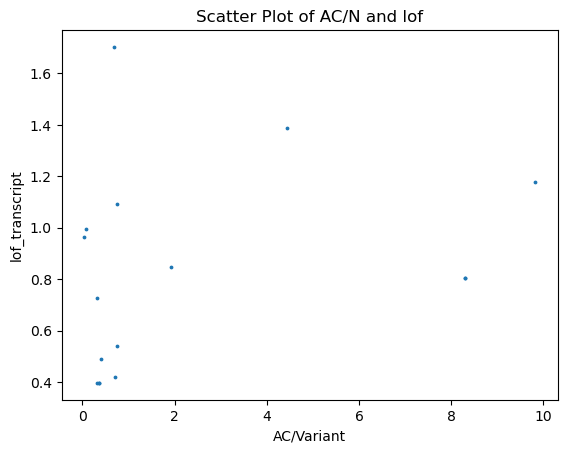

In [22]:
plt.scatter(np.log1p(transcripts_df_ac_CFLAR['AC/Variant']), transcripts_df_ac_CFLAR['lof_transcript'], s=3)
plt.xlabel('AC/Variant')
plt.ylabel('lof_transcript')
plt.title('Scatter Plot of AC/N and lof')
plt.show()

In [23]:
#transcripts_df_ac.to_csv('/home/bioinf/gnomad-variants/Grishchenko/processed_data/tables/ac_expression_tables/CFLAR_analysis.tsv', sep='\t', index=False)

## **HLA-DRA** major histocompatibility complex, class II, DR alpha
### Ensembl canonical transcript **ENST00000395388.7**

In [24]:
gene_data_HLADRA = pd.read_csv('/home/bioinf/gnomad-variants/Grishchenko/processed_data/tables/ac_expression_tables/HLA-DRA.tsv', 
                         sep='\t')
gene_data_HLADRA = gene_data_HLADRA[
    (gene_data_HLADRA['Feature_Type'] == 'Transcript') & 
    (gene_data_HLADRA['BIOTYPE'] == 'protein_coding') ]

values_to_filter = ['stop_gained', 'frameshift_variant', 'splice_donor_variant', 'splice_acceptor_variant']

gene_data_HLADRA = gene_data_HLADRA[gene_data_HLADRA['Consequence'].isin(values_to_filter)]
gene_data_HLADRA = gene_data_HLADRA[gene_data_HLADRA['Feature'].str.contains('ENST')]
gene_data_HLADRA

,CHROM,POS,ID,REF,ALT,AC,AC_afr,AC_amr,AC_nfe,AC_asj,...,BIOTYPE,EXON,INTRON,ALLELE_NUM,VARIANT_CLASS,CANONICAL,LoF,LoF_filter,LoF_flags,LoF_info
507,chr6,32439991,NaN,TAGCTGTGCTGATG,T,1,0,0,1,0,...,protein_coding,1/5,NaN,1,deletion,NaN,HC,NaN,PHYLOCSF_WEAK,PERCENTILE:0.0826086956521739
508,chr6,32439991,NaN,TAGCTGTGCTGATG,T,1,0,0,1,0,...,protein_coding,1/5,NaN,1,deletion,YES,HC,NaN,PHYLOCSF_WEAK,PERCENTILE:0.0745098039215686
1140,chr6,32442453,NaN,CAT,C,1,0,0,1,0,...,protein_coding,2/5,NaN,1,deletion,NaN,HC,NaN,NaN,PERCENTILE:0.130434782608696
1141,chr6,32442453,NaN,CAT,C,1,0,0,1,0,...,protein_coding,2/5,NaN,1,deletion,YES,HC,NaN,NaN,PERCENTILE:0.117647058823529
1155,chr6,32442467,NaN,GGCCGA,G,1,0,0,1,0,...,protein_coding,2/5,NaN,1,deletion,NaN,HC,NaN,NaN,PERCENTILE:0.156521739130435
1156,chr6,32442467,NaN,GGCCGA,G,1,0,0,1,0,...,protein_coding,2/5,NaN,1,deletion,YES,HC,NaN,NaN,PERCENTILE:0.141176470588235
1338,chr6,32442588,rs754420534,C,T,23,0,0,23,0,...,protein_coding,2/5,NaN,1,SNV,NaN,HC,NaN,NaN,PERCENTILE:0.323188405797101
1339,chr6,32442588,rs754420534,C,T,23,0,0,23,0,...,protein_coding,2/5,NaN,1,SNV,YES,HC,NaN,NaN,PERCENTILE:0.291503267973856
1359,chr6,32442609,NaN,C,T,2,0,0,1,0,...,protein_coding,2/5,NaN,1,SNV,NaN,HC,NaN,NaN,PERCENTILE:0.353623188405797
1360,chr6,32442609,NaN,C,T,2,0,0,1,0,...,protein_coding,2/5,NaN,1,SNV,YES,HC,NaN,NaN,PERCENTILE:0.318954248366013


In [25]:
gene_data_HLADRA[gene_data_HLADRA['Feature'] == 'ENST00000374982']['Consequence']

507          frameshift_variant
1140         frameshift_variant
1155         frameshift_variant
1338                stop_gained
1359                stop_gained
1470       splice_donor_variant
2127    splice_acceptor_variant
2130    splice_acceptor_variant
2133    splice_acceptor_variant
2190                stop_gained
2196                stop_gained
2241         frameshift_variant
2283         frameshift_variant
2313         frameshift_variant
2316         frameshift_variant
2388                stop_gained
2391                stop_gained
3012         frameshift_variant
3177         frameshift_variant
3186         frameshift_variant
3204         frameshift_variant
Name: Consequence, dtype: object

In [26]:
sum_ac_per_transcript = gene_data_HLADRA.groupby('Feature')['AC']

transcript_list = []

for key, group in sum_ac_per_transcript:
    transcript_list.append(key)
sum_ac_per_transcript = gene_data_HLADRA.groupby('Feature')['AC']

sum_ac = []

for key, group in sum_ac_per_transcript:
    unique_values = group.sum()  # Extract the unique values
    sum_ac.append(unique_values)

population_ac = ['AC_afr', 'AC_amr', 'AC_nfe', 'AC_asj', 'AC_sas', 'AC_eas', 'AC_mid', 'AC_fin']

sum_population_ac = [[], [], [], [], [], [], [], []]


for idx, el in enumerate(population_ac):
    sum_population = []
    sum_AC_per_transcript = gene_data_HLADRA.groupby('Feature')[el]
    for key, group in sum_AC_per_transcript:
        unique_values = group.sum()
        sum_population.append(unique_values)
        sum_population_ac[idx].append(sum(sum_population))
        sum_population = []

gene_name_per_transcript = gene_data_HLADRA.groupby('Feature')['SYMBOL']
gene_names = []

for key, group in gene_name_per_transcript:
    unique_values = group.unique()  # Extract the unique values
    gene_names.extend(unique_values)

gene_id_per_transcript = gene_data_HLADRA.groupby('Feature')['Gene']

gene_id = []

for key, group in gene_id_per_transcript:
    unique_values = group.unique()  # Extract the unique values
    gene_id.extend(unique_values)

alt_per_transcript = gene_data_HLADRA.groupby('Feature')['ALT']

alt_sum = []

for key, group in alt_per_transcript:
    unique_values = len(group.sum())
    alt_sum.append(unique_values)

transcripts_df_ac_HLADRA = pd.DataFrame({
    'Transcript_ID': transcript_list,
    'AC': sum_ac,
    'AC_afr': sum_population_ac[0],
    'AC_amr': sum_population_ac[1],
    'AC_nfe': sum_population_ac[2],
    'AC_asj': sum_population_ac[3],
    'AC_sas': sum_population_ac[4],
    'AC_eas': sum_population_ac[5],
    'AC_mid': sum_population_ac[6],
    'AC_fin': sum_population_ac[7],
    'Gene_name': gene_names,
    'Gene_id': gene_id,
    'Variant': alt_sum
})
transcripts_df_ac_HLADRA['AC/Variant'] = transcripts_df_ac_HLADRA['AC']/transcripts_df_ac_HLADRA['Variant']
transcripts_df_ac_HLADRA

,Transcript_ID,AC,AC_afr,AC_amr,AC_nfe,AC_asj,AC_sas,AC_eas,AC_mid,AC_fin,Gene_name,Gene_id,Variant,AC/Variant
0,ENST00000374982,850346,19627,27855,629882,18800,61821,26047,4213,26550,HLA-DRA,ENSG00000204287,29,29322.275862
1,ENST00000395388,51,0,0,48,0,2,1,0,0,HLA-DRA,ENSG00000204287,29,1.758621


In [27]:
matched_values = constraint_transcript_loeuf[constraint_transcript_loeuf['transcript'].isin(transcripts_df_ac_HLADRA['Transcript_ID'])]
matched_values.reset_index(inplace=True)
transcripts_df_ac_HLADRA['lof_transcript'] = matched_values['lof.oe_ci.upper']
transcripts_df_ac_HLADRA['Exon_number'] = matched_values['num_coding_exons']
transcripts_df_ac_HLADRA

,Transcript_ID,AC,AC_afr,AC_amr,AC_nfe,AC_asj,AC_sas,AC_eas,AC_mid,AC_fin,Gene_name,Gene_id,Variant,AC/Variant,lof_transcript,Exon_number
0,ENST00000374982,850346,19627,27855,629882,18800,61821,26047,4213,26550,HLA-DRA,ENSG00000204287,29,29322.275862,0.713,4.0
1,ENST00000395388,51,0,0,48,0,2,1,0,0,HLA-DRA,ENSG00000204287,29,1.758621,0.631,4.0


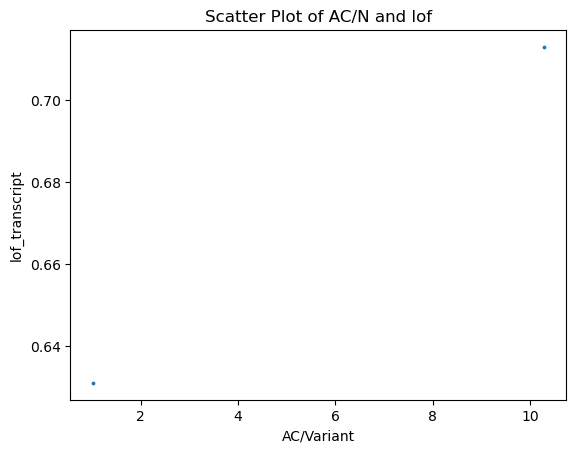

In [28]:
plt.scatter(np.log1p(transcripts_df_ac_HLADRA['AC/Variant']), transcripts_df_ac_HLADRA['lof_transcript'], s=3)
plt.xlabel('AC/Variant')
plt.ylabel('lof_transcript')
plt.title('Scatter Plot of AC/N and lof')
plt.show()

In [29]:
#transcripts_df_ac_HLADRA.to_csv('/home/bioinf/gnomad-variants/Grishchenko/processed_data/tables/ac_expression_tables/HLADRA_analysis.tsv', sep='\t', index=False)

## TPT1 tumor protein, translationally-controlled 1
### Ensembl canonical transcript **ENST00000530705.6**

In [30]:
gene_data_TPT1 = pd.read_csv('/home/bioinf/gnomad-variants/Grishchenko/processed_data/tables/ac_expression_tables/TPT1.tsv', 
                         sep='\t')
gene_data_TPT1 = gene_data_TPT1[
    (gene_data_TPT1['Feature_Type'] == 'Transcript') & 
    (gene_data_TPT1['BIOTYPE'] == 'protein_coding') ]

values_to_filter = ['stop_gained', 'frameshift_variant', 'splice_donor_variant', 'splice_acceptor_variant']

gene_data_TPT1 = gene_data_TPT1[gene_data_TPT1['Consequence'].isin(values_to_filter)]
gene_data_TPT1 = gene_data_TPT1[gene_data_TPT1['Feature'].str.contains('ENST')]
gene_data_TPT1

/tmp/ipykernel_1907651/2269910110.py:1: DtypeWarning: Columns (24,25,27,28,29,30,31,39,40,44,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  gene_data_TPT1 = pd.read_csv('/home/bioinf/gnomad-variants/Grishchenko/processed_data/tables/ac_expression_tables/TPT1.tsv',


,CHROM,POS,ID,REF,ALT,AC,AC_afr,AC_amr,AC_nfe,AC_asj,...,BIOTYPE,EXON,INTRON,ALLELE_NUM,VARIANT_CLASS,CANONICAL,LoF,LoF_filter,LoF_flags,LoF_info
10489,chr13,45337465,NaN,A,C,1,0,1,0,0,...,protein_coding,NaN,3/3,1,SNV,NaN,LC,3UTR_SPLICE,NaN,INTRON_SIZE:78
10536,chr13,45337465,rs757560906,A,G,5,0,0,2,0,...,protein_coding,NaN,3/3,1,SNV,NaN,LC,3UTR_SPLICE,NaN,INTRON_SIZE:78
11006,chr13,45337480,rs575834806,AG,A,258,2,26,182,14,...,protein_coding,3/4,NaN,1,deletion,NaN,HC,NaN,PHYLOCSF_WEAK,PERCENTILE:0.987068965517241
11008,chr13,45337480,rs575834806,AG,A,258,2,26,182,14,...,protein_coding,3/3,NaN,1,deletion,NaN,HC,NaN,PHYLOCSF_WEAK,PERCENTILE:0.987068965517241
11011,chr13,45337480,rs575834806,AG,A,258,2,26,182,14,...,protein_coding,6/6,NaN,1,deletion,NaN,HC,NaN,PHYLOCSF_WEAK,PERCENTILE:0.991582491582492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107431,chr13,45340752,NaN,C,CG,1,0,0,1,0,...,protein_coding,2/6,NaN,1,insertion,YES,HC,NaN,NaN,PERCENTILE:0.117533718689788
107433,chr13,45340752,NaN,C,CG,1,0,0,1,0,...,protein_coding,2/6,NaN,1,insertion,NaN,HC,NaN,NaN,PERCENTILE:0.102693602693603
108967,chr13,45340793,NaN,A,T,1,0,0,1,0,...,protein_coding,2/5,NaN,1,SNV,NaN,HC,NaN,NaN,PERCENTILE:0.037037037037037
109132,chr13,45340794,NaN,TAC,T,1,0,0,1,0,...,protein_coding,2/5,NaN,1,deletion,NaN,HC,NaN,NaN,PERCENTILE:0.0329218106995885


In [31]:
gene_data_TPT1[gene_data_TPT1['Feature'] == 'ENST00000527226']['Consequence']

53802          frameshift_variant
71017        splice_donor_variant
71567                 stop_gained
75142                 stop_gained
76462     splice_acceptor_variant
105832       splice_donor_variant
107427         frameshift_variant
108967                stop_gained
109132         frameshift_variant
110507    splice_acceptor_variant
Name: Consequence, dtype: object

In [32]:
sum_ac_per_transcript = gene_data_TPT1.groupby('Feature')['AC']

transcript_list = []

for key, group in sum_ac_per_transcript:
    transcript_list.append(key)
sum_ac_per_transcript = gene_data_TPT1.groupby('Feature')['AC']

sum_ac = []

for key, group in sum_ac_per_transcript:
    unique_values = group.sum()  # Extract the unique values
    sum_ac.append(unique_values)

population_ac = ['AC_afr', 'AC_amr', 'AC_nfe', 'AC_asj', 'AC_sas', 'AC_eas', 'AC_mid', 'AC_fin']

sum_population_ac = [[], [], [], [], [], [], [], []]


for idx, el in enumerate(population_ac):
    sum_population = []
    sum_AC_per_transcript = gene_data_TPT1.groupby('Feature')[el]
    for key, group in sum_AC_per_transcript:
        unique_values = group.sum()
        sum_population.append(unique_values)
        sum_population_ac[idx].append(sum(sum_population))
        sum_population = []

gene_name_per_transcript = gene_data_TPT1.groupby('Feature')['SYMBOL']
gene_names = []

for key, group in gene_name_per_transcript:
    unique_values = group.unique()  # Extract the unique values
    gene_names.extend(unique_values)

gene_id_per_transcript = gene_data_TPT1.groupby('Feature')['Gene']

gene_id = []

for key, group in gene_id_per_transcript:
    unique_values = group.unique()  # Extract the unique values
    gene_id.extend(unique_values)

alt_per_transcript = gene_data_TPT1.groupby('Feature')['ALT']

alt_sum = []

for key, group in alt_per_transcript:
    unique_values = len(group.sum())
    alt_sum.append(unique_values)

transcripts_df_ac_TPT1 = pd.DataFrame({
    'Transcript_ID': transcript_list,
    'AC': sum_ac,
    'AC_afr': sum_population_ac[0],
    'AC_amr': sum_population_ac[1],
    'AC_nfe': sum_population_ac[2],
    'AC_asj': sum_population_ac[3],
    'AC_sas': sum_population_ac[4],
    'AC_eas': sum_population_ac[5],
    'AC_mid': sum_population_ac[6],
    'AC_fin': sum_population_ac[7],
    'Gene_name': gene_names,
    'Gene_id': gene_id,
    'Variant': alt_sum
})
transcripts_df_ac_TPT1['AC/Variant'] = transcripts_df_ac_TPT1['AC']/transcripts_df_ac_TPT1['Variant']
transcripts_df_ac_TPT1

,Transcript_ID,AC,AC_afr,AC_amr,AC_nfe,AC_asj,AC_sas,AC_eas,AC_mid,AC_fin,Gene_name,Gene_id,Variant,AC/Variant
0,ENST00000309246,128,4,0,107,0,7,2,1,1,TPT1,ENSG00000133112,15,8.533333
1,ENST00000379055,9,0,0,5,0,2,1,1,0,TPT1,ENSG00000133112,7,1.285714
2,ENST00000379056,6,0,0,3,0,2,1,0,0,TPT1,ENSG00000133112,6,1.000000
3,ENST00000379060,10,0,0,6,0,2,1,1,0,TPT1,ENSG00000133112,9,1.111111
4,ENST00000527226,838051,25101,12587,678823,11455,33408,11404,2845,28864,TPT1,ENSG00000133112,11,76186.454545
5,ENST00000528619,549,14,33,342,14,64,36,8,17,TPT1,ENSG00000133112,26,21.115385
6,ENST00000530245,543,14,32,340,14,64,34,8,17,TPT1,ENSG00000133112,24,22.625000
7,ENST00000530705,10,0,0,6,0,2,1,1,0,TPT1,ENSG00000133112,9,1.111111
8,ENST00000616577,552,14,32,346,14,65,35,9,17,TPT1,ENSG00000133112,32,17.250000


In [33]:
matched_values = constraint_transcript_loeuf[constraint_transcript_loeuf['transcript'].isin(transcripts_df_ac_TPT1['Transcript_ID'])]
matched_values.reset_index(inplace=True)
transcripts_df_ac_TPT1['lof_transcript'] = matched_values['lof.oe_ci.upper']
transcripts_df_ac_TPT1['Exon_number'] = matched_values['num_coding_exons']
transcripts_df_ac_TPT1

,Transcript_ID,AC,AC_afr,AC_amr,AC_nfe,AC_asj,AC_sas,AC_eas,AC_mid,AC_fin,Gene_name,Gene_id,Variant,AC/Variant,lof_transcript,Exon_number
0,ENST00000309246,128,4,0,107,0,7,2,1,1,TPT1,ENSG00000133112,15,8.533333,0.591,5.0
1,ENST00000379055,9,0,0,5,0,2,1,1,0,TPT1,ENSG00000133112,7,1.285714,0.559,3.0
2,ENST00000379056,6,0,0,3,0,2,1,0,0,TPT1,ENSG00000133112,6,1.000000,0.559,3.0
3,ENST00000379060,10,0,0,6,0,2,1,1,0,TPT1,ENSG00000133112,9,1.111111,0.636,4.0
4,ENST00000527226,838051,25101,12587,678823,11455,33408,11404,2845,28864,TPT1,ENSG00000133112,11,76186.454545,0.870,4.0
5,ENST00000528619,549,14,33,342,14,64,36,8,17,TPT1,ENSG00000133112,26,21.115385,0.962,3.0
6,ENST00000530245,543,14,32,340,14,64,34,8,17,TPT1,ENSG00000133112,24,22.625000,0.962,3.0
7,ENST00000530705,10,0,0,6,0,2,1,1,0,TPT1,ENSG00000133112,9,1.111111,0.520,5.0
8,ENST00000616577,552,14,32,346,14,65,35,9,17,TPT1,ENSG00000133112,32,17.250000,0.682,6.0


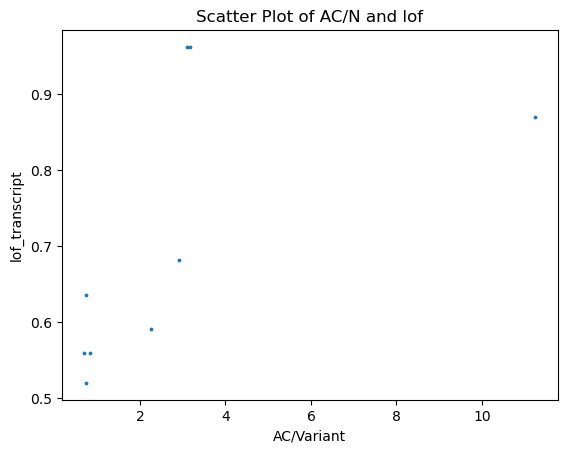

In [34]:
plt.scatter(np.log1p(transcripts_df_ac_TPT1['AC/Variant']), transcripts_df_ac_TPT1['lof_transcript'], s=3)
plt.xlabel('AC/Variant')
plt.ylabel('lof_transcript')
plt.title('Scatter Plot of AC/N and lof')
plt.show()

In [35]:
#transcripts_df_ac_TPT1.to_csv('/home/bioinf/gnomad-variants/Grishchenko/processed_data/tables/ac_expression_tables/TPT1_analysis.tsv', sep='\t', index=False)

## RPS10 ribosomal protein S10, 40S ribosomal protein S10
### Ensembl canonical transcript **ENST00000648437.1**

In [36]:
gene_data_RPS10 = pd.read_csv('/home/bioinf/gnomad-variants/Grishchenko/processed_data/tables/ac_expression_tables/RPS10.tsv', 
                         sep='\t')
gene_data_RPS10 = gene_data_RPS10[
    (gene_data_RPS10['Feature_Type'] == 'Transcript') & 
    (gene_data_RPS10['BIOTYPE'] == 'protein_coding') ]

values_to_filter = ['stop_gained', 'frameshift_variant', 'splice_donor_variant', 'splice_acceptor_variant']

gene_data_RPS10 = gene_data_RPS10[gene_data_RPS10['Consequence'].isin(values_to_filter)]
gene_data_RPS10 = gene_data_RPS10[gene_data_RPS10['Feature'].str.contains('ENST')]
gene_data_RPS10

/tmp/ipykernel_1907651/3197036116.py:1: DtypeWarning: Columns (25,27,28,31,44,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  gene_data_RPS10 = pd.read_csv('/home/bioinf/gnomad-variants/Grishchenko/processed_data/tables/ac_expression_tables/RPS10.tsv',


,CHROM,POS,ID,REF,ALT,AC,AC_afr,AC_amr,AC_nfe,AC_asj,...,BIOTYPE,EXON,INTRON,ALLELE_NUM,VARIANT_CLASS,CANONICAL,LoF,LoF_filter,LoF_flags,LoF_info
1221,chr6,34417511,NaN,G,A,1,0,0,1,0,...,protein_coding,6/6,NaN,1,SNV,NaN,HC,NaN,NaN,PERCENTILE:0.98995983935743
1222,chr6,34417511,NaN,G,A,1,0,0,1,0,...,protein_coding,6/6,NaN,1,SNV,NaN,HC,NaN,NaN,PERCENTILE:0.98995983935743
1223,chr6,34417511,NaN,G,A,1,0,0,1,0,...,protein_coding,6/6,NaN,1,SNV,NaN,HC,NaN,NaN,PERCENTILE:0.98995983935743
1224,chr6,34417511,NaN,G,A,1,0,0,1,0,...,protein_coding,6/6,NaN,1,SNV,NaN,HC,NaN,PHYLOCSF_WEAK,PERCENTILE:0.991087344028521
1226,chr6,34417511,NaN,G,A,1,0,0,1,0,...,protein_coding,6/6,NaN,1,SNV,YES,HC,NaN,NaN,PERCENTILE:0.98995983935743
1614,chr6,34417588,NaN,T,TGG,2,0,0,2,0,...,protein_coding,6/6,NaN,1,insertion,NaN,HC,NaN,PHYLOCSF_WEAK,PERCENTILE:0.85204991087344
1624,chr6,34417589,rs1173609074,G,A,1,0,0,1,0,...,protein_coding,6/6,NaN,1,SNV,NaN,HC,NaN,PHYLOCSF_WEAK,PERCENTILE:0.85204991087344
1634,chr6,34417590,NaN,GT,G,1,0,0,0,0,...,protein_coding,6/6,NaN,1,deletion,NaN,HC,NaN,PHYLOCSF_WEAK,PERCENTILE:0.848484848484849
1714,chr6,34417612,rs1458193882,T,C,39,0,0,31,0,...,protein_coding,NaN,5/5,1,SNV,NaN,HC,NaN,NaN,INTRON_SIZE:758
3070,chr6,34417864,NaN,AC,A,1,0,0,1,0,...,protein_coding,6/7,NaN,1,deletion,NaN,HC,NaN,PHYLOCSF_WEAK,PERCENTILE:0.942196531791908


In [37]:
gene_data_RPS10[gene_data_RPS10['Feature'] == 'ENST00000344700']

,CHROM,POS,ID,REF,ALT,AC,AC_afr,AC_amr,AC_nfe,AC_asj,...,BIOTYPE,EXON,INTRON,ALLELE_NUM,VARIANT_CLASS,CANONICAL,LoF,LoF_filter,LoF_flags,LoF_info
3070,chr6,34417864,NaN,AC,A,1,0,0,1,0,...,protein_coding,6/7,NaN,1,deletion,NaN,HC,NaN,PHYLOCSF_WEAK,PERCENTILE:0.942196531791908
3090,chr6,34417872,rs1437134959,TGA,T,1,0,0,0,0,...,protein_coding,6/7,NaN,1,deletion,NaN,HC,NaN,PHYLOCSF_WEAK,PERCENTILE:0.926782273603083
3230,chr6,34417899,rs190411459,T,C,3426,7,33,1484,11,...,protein_coding,NaN,5/6,1,SNV,NaN,HC,NaN,NaN,INTRON_SIZE:471
8153,chr6,34421729,NaN,C,T,2,0,0,1,0,...,protein_coding,NaN,4/6,1,SNV,NaN,HC,NaN,NaN,INTRON_SIZE:3305
8329,chr6,34421755,rs1373580194,ATC,A,2,0,0,1,1,...,protein_coding,4/7,NaN,1,deletion,NaN,HC,NaN,NaN,PERCENTILE:0.720616570327553


In [38]:
sum_ac_per_transcript = gene_data_RPS10.groupby('Feature')['AC']

transcript_list = []

for key, group in sum_ac_per_transcript:
    transcript_list.append(key)
sum_ac_per_transcript = gene_data_RPS10.groupby('Feature')['AC']

sum_ac = []

for key, group in sum_ac_per_transcript:
    unique_values = group.sum()  # Extract the unique values
    sum_ac.append(unique_values)

population_ac = ['AC_afr', 'AC_amr', 'AC_nfe', 'AC_asj', 'AC_sas', 'AC_eas', 'AC_mid', 'AC_fin']

sum_population_ac = [[], [], [], [], [], [], [], []]


for idx, el in enumerate(population_ac):
    sum_population = []
    sum_AC_per_transcript = gene_data_RPS10.groupby('Feature')[el]
    for key, group in sum_AC_per_transcript:
        unique_values = group.sum()
        sum_population.append(unique_values)
        sum_population_ac[idx].append(sum(sum_population))
        sum_population = []

gene_name_per_transcript = gene_data_RPS10.groupby('Feature')['SYMBOL']
gene_names = []

for key, group in gene_name_per_transcript:
    unique_values = group.unique()  # Extract the unique values
    gene_names.extend(unique_values)

gene_id_per_transcript = gene_data_RPS10.groupby('Feature')['Gene']

gene_id = []

for key, group in gene_id_per_transcript:
    unique_values = group.unique()  # Extract the unique values
    gene_id.extend(unique_values)

alt_per_transcript = gene_data_RPS10.groupby('Feature')['ALT']

alt_sum = []

for key, group in alt_per_transcript:
    unique_values = len(group.sum())
    alt_sum.append(unique_values)

transcripts_df_ac_RPS10 = pd.DataFrame({
    'Transcript_ID': transcript_list,
    'AC': sum_ac,
    'AC_afr': sum_population_ac[0],
    'AC_amr': sum_population_ac[1],
    'AC_nfe': sum_population_ac[2],
    'AC_asj': sum_population_ac[3],
    'AC_sas': sum_population_ac[4],
    'AC_eas': sum_population_ac[5],
    'AC_mid': sum_population_ac[6],
    'AC_fin': sum_population_ac[7],
    'Gene_name': gene_names,
    'Gene_id': gene_id,
    'Variant': alt_sum
})
transcripts_df_ac_RPS10['AC/Variant'] = transcripts_df_ac_RPS10['AC']/transcripts_df_ac_RPS10['Variant']
transcripts_df_ac_RPS10

,Transcript_ID,AC,AC_afr,AC_amr,AC_nfe,AC_asj,AC_sas,AC_eas,AC_mid,AC_fin,Gene_name,Gene_id,Variant,AC/Variant
0,ENST00000344700,3432,7,33,1487,12,11,0,0,1753,RPS10,ENSG00000124614,5,686.400000
1,ENST00000464218,5,0,0,3,1,0,0,0,1,RPS10,ENSG00000124614,3,1.666667
2,ENST00000467531,5,0,0,3,1,0,0,0,1,RPS10,ENSG00000124614,3,1.666667
3,ENST00000621356,5,0,0,3,1,0,0,0,1,RPS10,ENSG00000124614,3,1.666667
4,ENST00000644393,48,0,0,37,1,0,8,0,1,RPS10,ENSG00000124614,9,5.333333
5,ENST00000644700,32,2,2,20,1,5,0,1,1,RPS10,ENSG00000124614,16,2.000000
6,ENST00000648437,5,0,0,3,1,0,0,0,1,RPS10,ENSG00000124614,3,1.666667


In [39]:
matched_values = constraint_transcript_loeuf[constraint_transcript_loeuf['transcript'].isin(transcripts_df_ac_RPS10['Transcript_ID'])]
matched_values.reset_index(inplace=True)
transcripts_df_ac_RPS10['lof_transcript'] = matched_values['lof.oe_ci.upper']
transcripts_df_ac_RPS10['Exon_number'] = matched_values['num_coding_exons']
transcripts_df_ac_RPS10

,Transcript_ID,AC,AC_afr,AC_amr,AC_nfe,AC_asj,AC_sas,AC_eas,AC_mid,AC_fin,Gene_name,Gene_id,Variant,AC/Variant,lof_transcript,Exon_number
0,ENST00000344700,3432,7,33,1487,12,11,0,0,1753,RPS10,ENSG00000124614,5,686.400000,0.221,5.0
1,ENST00000464218,5,0,0,3,1,0,0,0,1,RPS10,ENSG00000124614,3,1.666667,0.265,5.0
2,ENST00000467531,5,0,0,3,1,0,0,0,1,RPS10,ENSG00000124614,3,1.666667,0.265,5.0
3,ENST00000621356,5,0,0,3,1,0,0,0,1,RPS10,ENSG00000124614,3,1.666667,0.265,5.0
4,ENST00000644393,48,0,0,37,1,0,8,0,1,RPS10,ENSG00000124614,9,5.333333,0.269,5.0
5,ENST00000644700,32,2,2,20,1,5,0,1,1,RPS10,ENSG00000124614,16,2.000000,0.338,4.0
6,ENST00000648437,5,0,0,3,1,0,0,0,1,RPS10,ENSG00000124614,3,1.666667,0.265,5.0


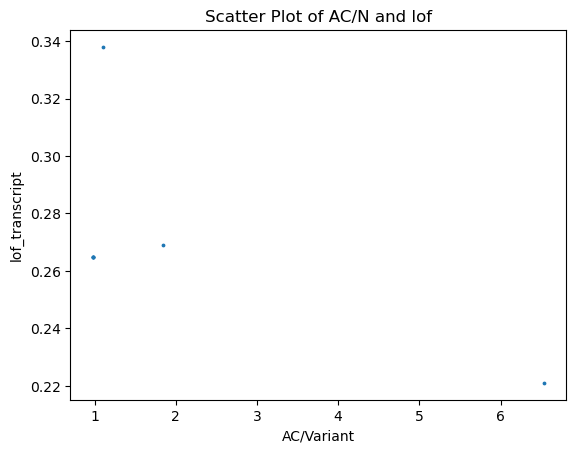

In [40]:
plt.scatter(np.log1p(transcripts_df_ac_RPS10['AC/Variant']), transcripts_df_ac_RPS10['lof_transcript'], s=3)
plt.xlabel('AC/Variant')
plt.ylabel('lof_transcript')
plt.title('Scatter Plot of AC/N and lof')
plt.show()

In [41]:
#transcripts_df_ac_RPS10.to_csv('/home/bioinf/gnomad-variants/Grishchenko/processed_data/tables/ac_expression_tables/RPS10_analysis.tsv', sep='\t', index=False)

## ZFP91
### Ensembl canonical transcript ENST00000316059.7

In [42]:
gene_data_ZFP91 = pd.read_csv('/home/bioinf/gnomad-variants/Grishchenko/processed_data/tables/ac_expression_tables/ZFP91.tsv', 
                         sep='\t')
gene_data_ZFP91 = gene_data_ZFP91[
    (gene_data_ZFP91['Feature_Type'] == 'Transcript') & 
    (gene_data_ZFP91['BIOTYPE'] == 'protein_coding') ]

values_to_filter = ['stop_gained', 'frameshift_variant', 'splice_donor_variant', 'splice_acceptor_variant']

gene_data_ZFP91 = gene_data_ZFP91[gene_data_ZFP91['Consequence'].isin(values_to_filter)]
gene_data_ZFP91 = gene_data_ZFP91[gene_data_ZFP91['Feature'].str.contains('ENST')]
gene_data_ZFP91

/tmp/ipykernel_1907651/2304394373.py:1: DtypeWarning: Columns (24,25,26,27,28,29,30,40,44,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  gene_data_ZFP91 = pd.read_csv('/home/bioinf/gnomad-variants/Grishchenko/processed_data/tables/ac_expression_tables/ZFP91.tsv',


,CHROM,POS,ID,REF,ALT,AC,AC_afr,AC_amr,AC_nfe,AC_asj,...,BIOTYPE,EXON,INTRON,ALLELE_NUM,VARIANT_CLASS,CANONICAL,LoF,LoF_filter,LoF_flags,LoF_info
5515,chr11,58579286,NaN,C,CG,1,0,0,0,0,...,protein_coding,1/11,NaN,1.0,insertion,YES,HC,NaN,NaN,PERCENTILE:0.00583771161704612
5525,chr11,58579286,rs1269291609,CG,C,5,0,0,1,0,...,protein_coding,1/11,NaN,1.0,deletion,YES,HC,NaN,NaN,PERCENTILE:0.00583771161704612
5655,chr11,58579308,NaN,A,AC,1,0,1,0,0,...,protein_coding,1/11,NaN,1.0,insertion,YES,HC,NaN,NaN,PERCENTILE:0.0186806771745476
5670,chr11,58579308,rs1447418115,AC,A,2,0,0,1,0,...,protein_coding,1/11,NaN,1.0,deletion,YES,HC,NaN,NaN,PERCENTILE:0.0186806771745476
5780,chr11,58579325,NaN,AC,A,1,0,1,0,0,...,protein_coding,1/11,NaN,1.0,deletion,YES,HC,NaN,NaN,PERCENTILE:0.0268534734384121
6075,chr11,58579377,NaN,GC,G,3,1,1,1,0,...,protein_coding,1/11,NaN,1.0,deletion,YES,HC,NaN,NaN,PERCENTILE:0.0589608873321658
6895,chr11,58579529,NaN,GC,G,1,0,0,1,0,...,protein_coding,1/11,NaN,1.0,deletion,YES,HC,NaN,NaN,PERCENTILE:0.147110332749562
7055,chr11,58579564,NaN,C,T,1,0,0,0,0,...,protein_coding,1/11,NaN,1.0,SNV,YES,HC,NaN,NaN,PERCENTILE:0.165207238762405
7080,chr11,58579570,NaN,C,T,1,0,0,1,0,...,protein_coding,1/11,NaN,1.0,SNV,YES,HC,NaN,NaN,PERCENTILE:0.168709865732633
8810,chr11,58584859,NaN,C,A,1,0,0,1,0,...,protein_coding,2/11,NaN,1.0,SNV,YES,HC,NaN,NaN,PERCENTILE:0.201401050788091


In [43]:
sum_ac_per_transcript = gene_data_ZFP91.groupby('Feature')['AC']

transcript_list = []

for key, group in sum_ac_per_transcript:
    transcript_list.append(key)
sum_ac_per_transcript = gene_data_ZFP91.groupby('Feature')['AC']

sum_ac = []

for key, group in sum_ac_per_transcript:
    unique_values = group.sum()  # Extract the unique values
    sum_ac.append(unique_values)

population_ac = ['AC_afr', 'AC_amr', 'AC_nfe', 'AC_asj', 'AC_sas', 'AC_eas', 'AC_mid', 'AC_fin']

sum_population_ac = [[], [], [], [], [], [], [], []]


for idx, el in enumerate(population_ac):
    sum_population = []
    sum_AC_per_transcript = gene_data_ZFP91.groupby('Feature')[el]
    for key, group in sum_AC_per_transcript:
        unique_values = group.sum()
        sum_population.append(unique_values)
        sum_population_ac[idx].append(sum(sum_population))
        sum_population = []

gene_name_per_transcript = gene_data_ZFP91.groupby('Feature')['SYMBOL']
gene_names = []

for key, group in gene_name_per_transcript:
    unique_values = group.unique()  # Extract the unique values
    gene_names.extend(unique_values)

gene_id_per_transcript = gene_data_ZFP91.groupby('Feature')['Gene']

gene_id = []

for key, group in gene_id_per_transcript:
    unique_values = group.unique()  # Extract the unique values
    gene_id.extend(unique_values)

alt_per_transcript = gene_data_ZFP91.groupby('Feature')['ALT']

alt_sum = []

for key, group in alt_per_transcript:
    unique_values = len(group.sum())
    alt_sum.append(unique_values)

transcripts_df_ac_ZFP91 = pd.DataFrame({
    'Transcript_ID': transcript_list,
    'AC': sum_ac,
    'AC_afr': sum_population_ac[0],
    'AC_amr': sum_population_ac[1],
    'AC_nfe': sum_population_ac[2],
    'AC_asj': sum_population_ac[3],
    'AC_sas': sum_population_ac[4],
    'AC_eas': sum_population_ac[5],
    'AC_mid': sum_population_ac[6],
    'AC_fin': sum_population_ac[7],
    'Gene_name': gene_names,
    'Gene_id': gene_id,
    'Variant': alt_sum
})
transcripts_df_ac_ZFP91['AC/Variant'] = transcripts_df_ac_ZFP91['AC']/transcripts_df_ac_RPS10['Variant']
transcripts_df_ac_ZFP91

,Transcript_ID,AC,AC_afr,AC_amr,AC_nfe,AC_asj,AC_sas,AC_eas,AC_mid,AC_fin,Gene_name,Gene_id,Variant,AC/Variant
0,ENST00000316059,38435,147,385,31837,641,1799,13,83,2146,ZFP91,ENSG00000186660,39,7687.0


In [44]:
matched_values = constraint_transcript_loeuf[constraint_transcript_loeuf['transcript'].isin(transcripts_df_ac_ZFP91['Transcript_ID'])]
matched_values.reset_index(inplace=True)
transcripts_df_ac_ZFP91['lof_transcript'] = matched_values['lof.oe_ci.upper']
transcripts_df_ac_ZFP91['Exon_number'] = matched_values['num_coding_exons']
transcripts_df_ac_ZFP91

,Transcript_ID,AC,AC_afr,AC_amr,AC_nfe,AC_asj,AC_sas,AC_eas,AC_mid,AC_fin,Gene_name,Gene_id,Variant,AC/Variant,lof_transcript,Exon_number
0,ENST00000316059,38435,147,385,31837,641,1799,13,83,2146,ZFP91,ENSG00000186660,39,7687.0,0.237,11.0
